### Importar las librerías ###
Lo primero que debe hacerse es importar las librerías a usar

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


>**Cargar los datos:**
* Debemos inicialmente cargar o leer los datos.
* Luego miramos las diferentes columnas y sus valores. 

In [33]:
df = pd.read_csv('household_power_consumption.txt',sep=";")
#imprimiendo los primeros 5 valores 
df.head()

/home/dayanm/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


Luego veremos la cantidad de datos de entrada, los tipos y las columnas listadas con sus nombres. 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Verificamos si hay datos que no correspondan a números. 

In [35]:
df1 = df[df.isna().any(axis=1)]
df1

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


Debido a como se leen los datos y los tipos de datos leídos es preferible cargar los datos de otra forma para una mejor lectura y conservar los valores númericos que son más importantes. Por lo tanto se hará:
* Unir los campos de fecha en uno solo(datetime - dt).
* Convertir la fecha en la columna indice.
* Leeremos de forma uniforme los valores no numericos como ? y NaN. 

In [36]:
df = pd.read_csv('household_power_consumption.txt',sep=";",
                 parse_dates={'dt':['Date','Time']},
                infer_datetime_format=True,
                low_memory=False, na_values=['nan','?'],
                index_col='dt')
#imprimiendo los primeros 5 valores 
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [38]:
df1 = df[df.isna().any(axis=1)]
df1

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2010-09-28 19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Debido a que todavía existen columnas con valores no numericos aprox. 25979 por el momento se eliminaran esas filas de los datos. Aunque se podrían intentar reemplazar estas filas con otros valores, por el momento lo más apropiado sería eliminarlas ya que contaminan los datos y solo representan 1.25% de los datos totales. 

In [39]:
df = df.dropna()
#Verificamos que no hayan valores nan
df1 = df[df.isna().any(axis=1)]
df1

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB


#### Descripción de los datos #### 
Aquí veremos una descripción breve de los datos con medidas como la media, la desviación estandar, valores maximos y minimos, entre otros, que nos ayudarán a tener un panorama más amplio de los datos. 

In [41]:
df.describe(include='all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


### Visualización de los datos #### 
En este segmento visualizaremos gráficas relevantes acerca el comportamiento de la potencia activa que es la medida del consumo eléctrico en los hogares.

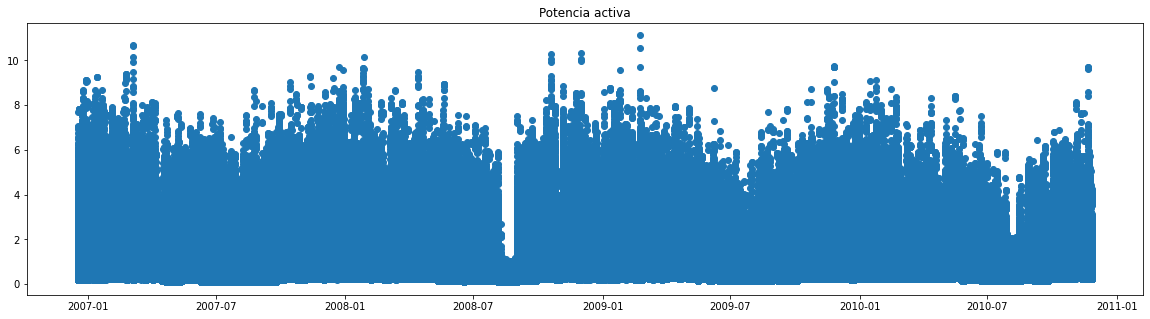

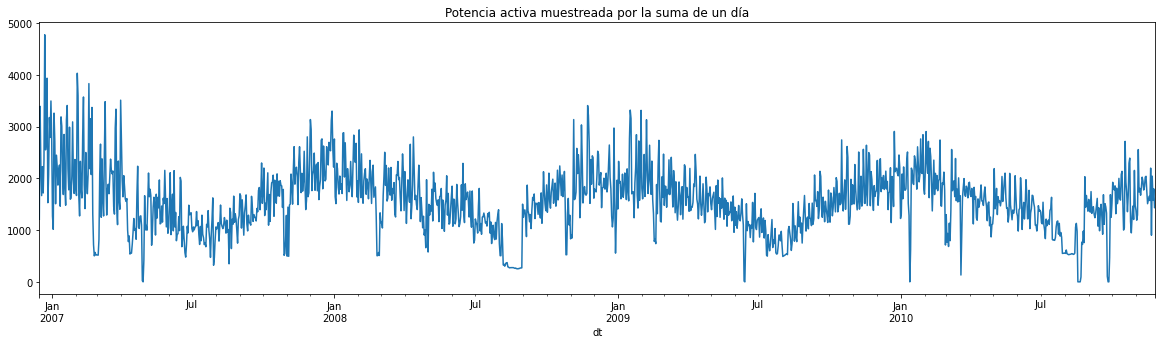

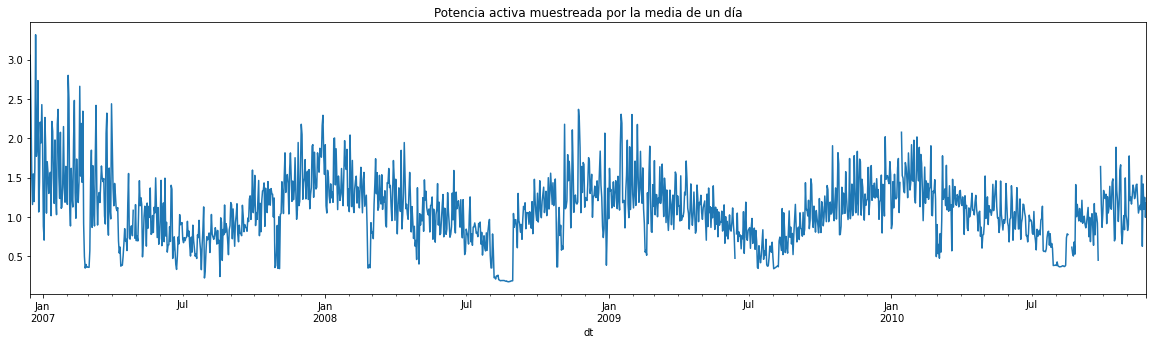

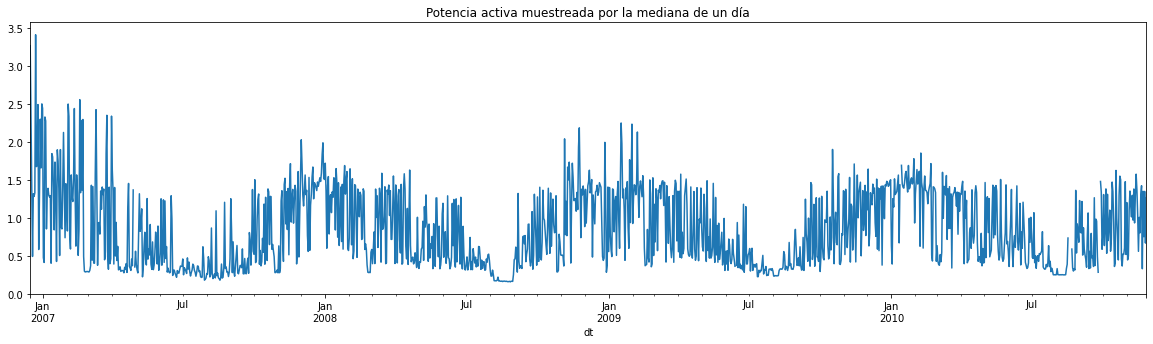

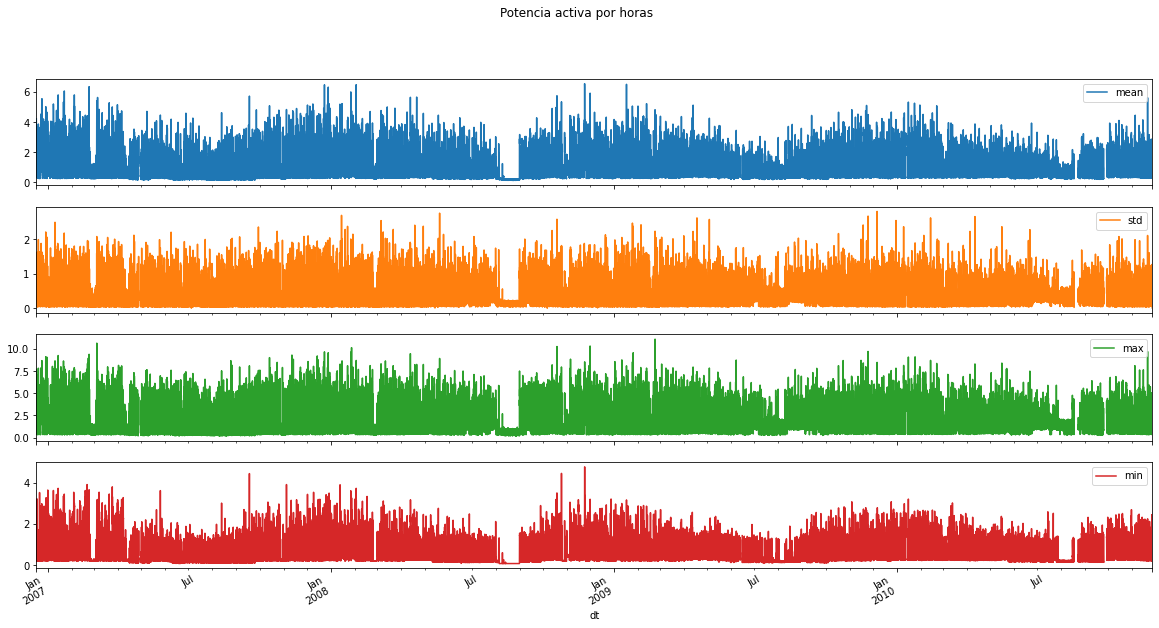

In [42]:
# Visualización de la potencia activa

#Global_active_power
plt.figure(figsize=(20, 5))
plt.scatter(df.index, df['Global_active_power'])
plt.title("Potencia activa")
plt.show()

plt.figure(figsize=(20, 5))
df.Global_active_power.resample('D').sum().plot(title='Potencia activa muestreada por la suma de un día')
plt.show()


plt.figure(figsize=(20, 5))
df.Global_active_power.resample('D').mean().plot(title='Potencia activa muestreada por la media de un día')
plt.show()

plt.figure(figsize=(20, 5))
df.Global_active_power.resample('D').median().plot(title='Potencia activa muestreada por la mediana de un día')
plt.show()

h = df.Global_active_power.resample('h').agg(['mean', 'std', 'max', 'min'])
h.plot(subplots=True, figsize=(20, 10), title='Potencia activa por horas')
plt.show()

In [43]:
times = pd.DatetimeIndex(df.index)
series = df.Global_active_power
mean_hour_consumption = series.groupby(times.hour).mean().values

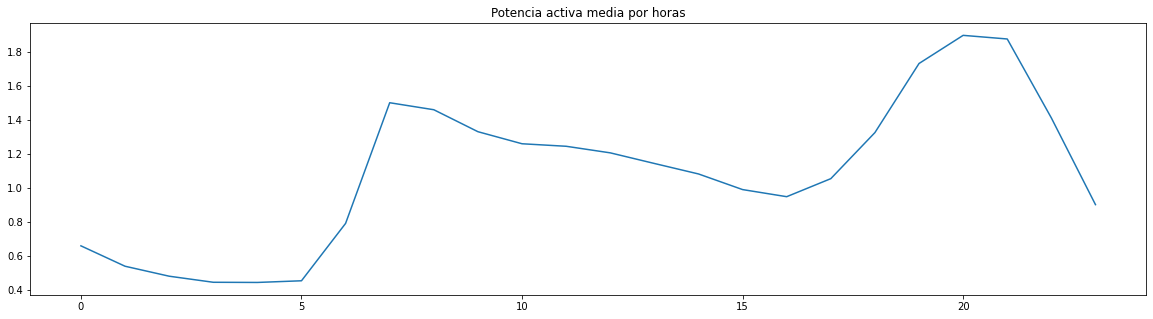

In [44]:
plt.figure(figsize=(20, 5))
plt.title("Potencia activa media por horas")
plt.plot(mean_hour_consumption)

### Modelo predictivo #### 
En este segmento se creará el modelo de predicción para la potencia activa. Seguiremos la secuencia de pasos lógicos para la creación del modelo de predicción.
* Preparar los datos 
* Dividir los datos 
* Normalizar los datos 
* Creación del modelo
* Medición de error 
* Visualización de las predicciones

In [45]:
# Preparación de los datos 
# Re-muestrear la data promedio por cada hora
data_resample = df.resample('h').mean()
print("tamaño data muestreada ",data_resample.shape)
data_resample.head()

tamaño data muestreada  (34589, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


Se decidió remuestrear por horas para no tener esa gran cantidad de datos por minuto que hay entre muestra y muestra. 

In [46]:
# Dividir los datos

# Dividimos las variables características de la objetivo 
X = data_resample.drop("Global_active_power", axis=1)
X = X.reset_index(drop=True)
X.head()

y = data_resample["Global_active_power"].reset_index(drop=True)
y.head()

# Dividimos el dataset en entrenamiento y prueba en este caso 70% entrenamiento 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Eliminamos valores no númericos que puedan surgir luego de la división. 
# Esto se realizó porque en los pasos posteriores se dectectaron valores NaN en la división. 
X_train = X_train.dropna()

X_test = X_test.dropna()

y_train = y_train.dropna()

y_test = y_test.dropna()

(24212, 6)
(10377, 6)
(24212,)
(10377,)


Es recomendable dividir los datos un porcentaje para entrenamiento y otro de prueba para evaluar que tan bueno fue el modelo

In [47]:
# Normalizar los datos

# Escalador de características
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalizar X_train
X_train_norm = scaler.fit_transform(X_train)
print(X_train.shape)

# Normalizar X_test
X_test_norm = scaler.fit_transform(X_test)
print(X_test.shape)

(23924, 6)
(10244, 6)


Es recomendable escalar los datos puesto que se tienden a obtener mejores resultados.

Se opto por escoger un modelo de regresión dado que el problema es predicir el consumo de energía de los hogares. Es decir un problema de regresión por esto se opto por un modelo SVM tipo regresor.

In [48]:
# Creación del model predictivo SVM para regresión
model = SVR()
# Entrenamiento 
model.fit(X_train_norm,y_train)
# Predicción
y_pred = model.predict(X_test_norm)

Para evaluar la regresión es recomendable el calcular el error cuadrático medio como medida de que tan alejados están los puntos predichos por el modelo de los puntos reales.

In [49]:
# Cálculo RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.051


Visualizaremos los datos contrastando los datos reales vs la predicción.

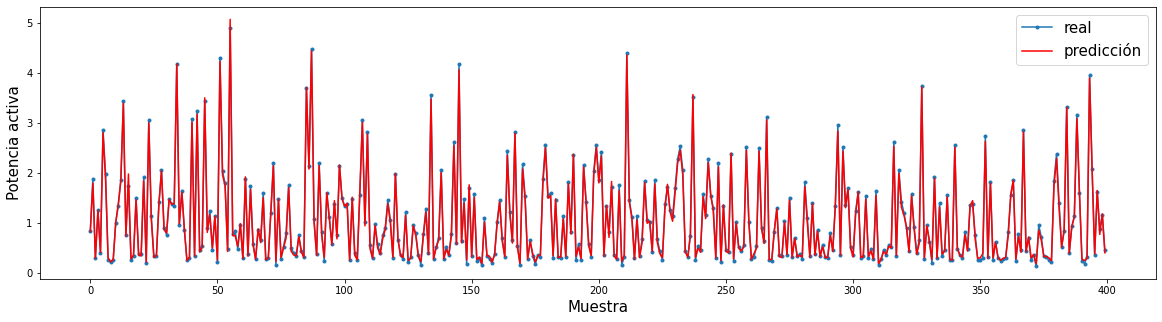

In [50]:
#Visualización de las predicciones para 400 datos 
n_datos = 400
tiempo_disc=[y_pred for y_pred in range(n_datos)]
plt.figure(figsize=(20, 5))
plt.plot(tiempo_disc, y_test[:n_datos], marker='.', label="real")
plt.plot(tiempo_disc, y_pred[:n_datos], 'r', label="predicción")
plt.ylabel('Potencia activa', size=15)
plt.xlabel('Muestra', size=15)
plt.legend(fontsize=15)
plt.show()

* En conclusión por los resultados obtenidos se puede apreciar que se obtienen muy buenos resultados con el predictor creado. En este caso con una aplicación básica de svm se pudieron obtener muy buenos resultados, aunque se sospecha que los datos pueden estar en overfiting sin embargo se deben realizar más pruebas para determinar esto.